# 1. Business Problem
# 1.1 Problem Context
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.




# 1.2 Problems with current approach

Currently, the retailer simply groups their international customers by country. As you`ll see in the project, this is quite inefficient because:
*   There`s a large number of countries(which kind of defeats the purpose of creating groups)
*  Some countries have very few customers



# 1.3 Problem Statement

You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

# 1.4 Business Objectives and constraints
# 2. Machine Learning Problem
# 2.1 Data Overview

This file contains the basic information (ID, age, gender, income, spending score) about the customers
* ID- Customer ID
* age - Customer age
* gender - Customer gender
* income- Customer income
* Spending - where customer spends
* Score- What is customer score




# 2.2 Mapping Business problem to ML problem
# 2.2.1 Type of ML problem

It is an unsupervised learning task, where given the features about each transaction, we need to segment the customers based on their buying patterns.

* It is importnat to note that the given data is transaction-level while the clusters (or segmenst) we need to create are customer-level.

# 3. Exploratory Data Analysis

Import the libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport
import warnings
# Ignore warnings
warnings.filterwarnings("ignore")


# Read Dataset

In [2]:
data=pd.read_csv('/content/Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.shape

(200, 5)

The dataset contains rows 200 and 5 columns.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
# Check for missing values
missing_values = data.isna().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


# Data Visualization


Step 3: Visualize gender distribution using a pie chart



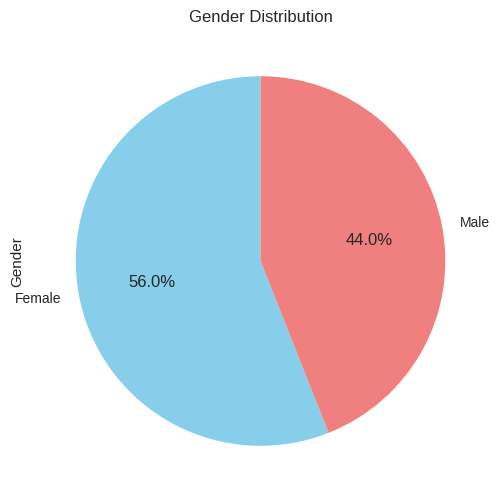

In [10]:
# Visualize gender distribution using a pie chart
print("\nStep 3: Visualize gender distribution using a pie chart\n")
plt.figure(figsize=(6, 6))
data['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.show()

From the pie we can see that out of 100 44 % is Male and remaining is Female i.e is 56%


Step 5: Visualize the annual income distribution using a histogram



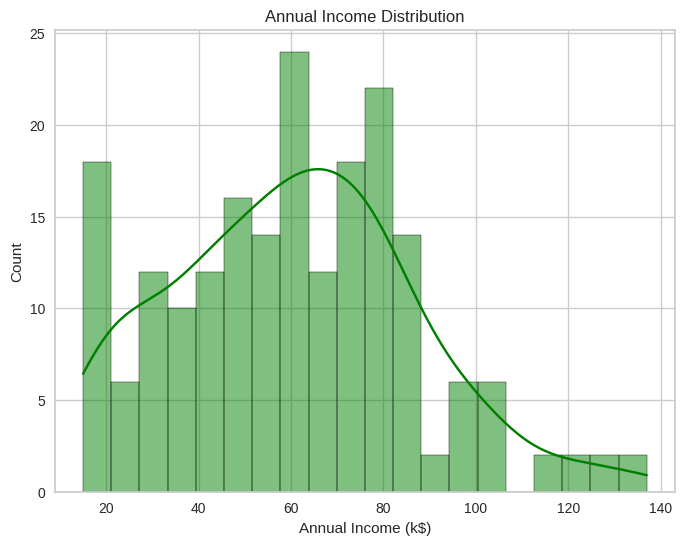

In [11]:
# Visualize the annual income distribution using a histogram
print("\nStep 5: Visualize the annual income distribution using a histogram\n")
plt.figure(figsize=(8, 6))
sns.histplot(data['Annual Income (k$)'], bins=20, kde=True, color='green')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.show()

From this histogram we can see the graph goes in curve direction.


Step 6: Visualize the spending score distribution using a box plot



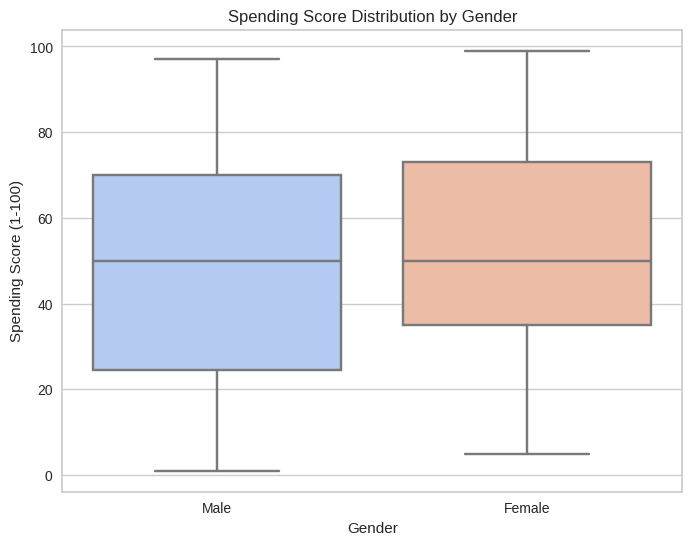

In [12]:
# Visualize the spending score distribution using a box plot
print("\nStep 6: Visualize the spending score distribution using a box plot\n")
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=data, palette='coolwarm')
plt.title('Spending Score Distribution by Gender')
plt.show()

In [14]:
# Check for duplicates in the dataset
print("\nStep 7: Check for duplicates in the dataset\n")
duplicates = data.duplicated().sum()
print("Number of Duplicates:", duplicates)


Step 7: Check for duplicates in the dataset

Number of Duplicates: 0


# K Means Clustering

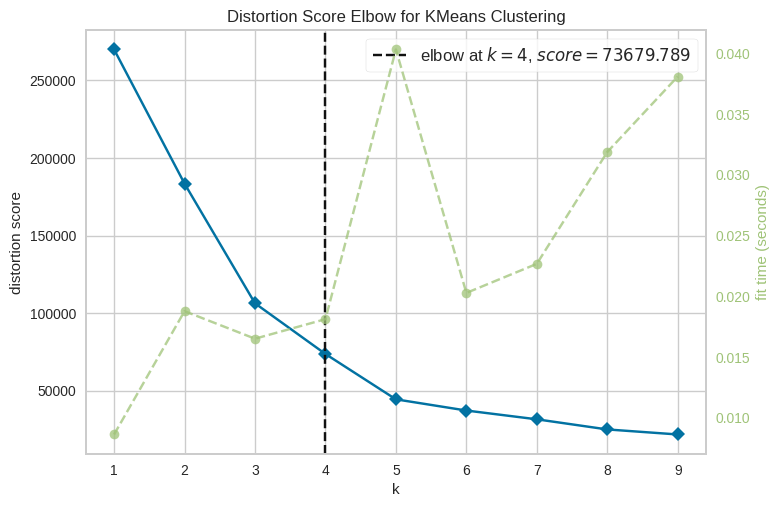

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
# Elbow method using yellowbrick
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
visualizer = KElbowVisualizer(KMeans(), k=(1, 10))
visualizer.fit(X)
visualizer.show()

Distortion Score Elbow for KMeans Clustering shows that xlabel that is 'K' is going decreasing and then increasing. and ylabel the graph goes in decreasing way.

In [17]:
# KMeans clustering
k_clusters = 5
km = KMeans(n_clusters=k_clusters, random_state=42)
data['Clusters'] = km.fit_predict(X)

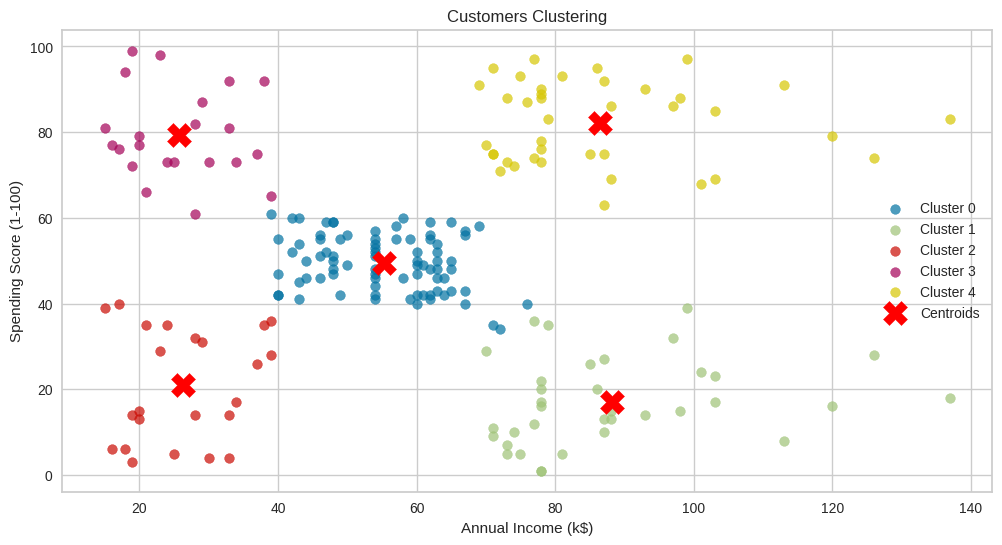

In [18]:
# Visualize the clusters
plt.figure(figsize=(12, 6))
for cluster in range(k_clusters):
    plt.scatter(X[data['Clusters'] == cluster]['Annual Income (k$)'],
                X[data['Clusters'] == cluster]['Spending Score (1-100)'],
                label=f'Cluster {cluster}', alpha=0.7)

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('Customers Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Model Evalution

In [19]:
X = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
y = data['Clusters']

In [20]:
# Encode categorical variable 'Gender'
LE = LabelEncoder()
X['Gender'] = LE.fit_transform(X['Gender'])

In [21]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Standardize the data
SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

# XG Boost

In [24]:
model = xgb.XGBClassifier(objective='multi:softmax', num_class=k_clusters, random_state=42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=5,
              num_parallel_tree=None, ...)

In [25]:
# Predictions and Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Accuracy

In [26]:
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 95.00%


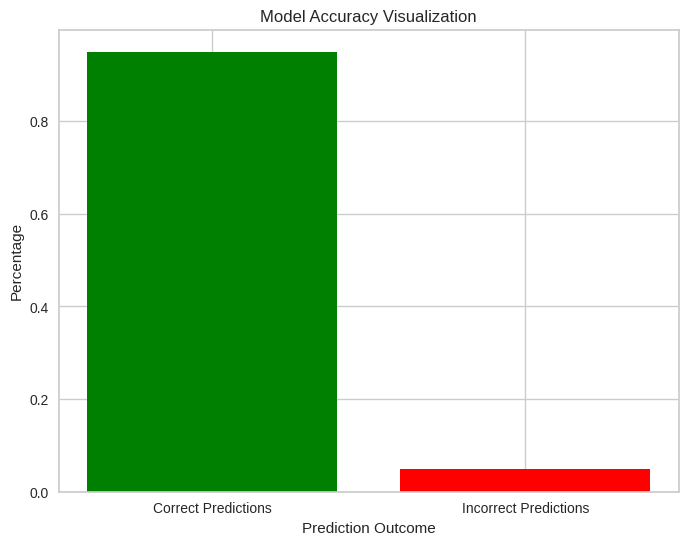

In [27]:
# Visualize Accuracy
plt.figure(figsize=(8, 6))
accuracies = [accuracy, 1 - accuracy]  # Accuracy and error
labels = ['Correct Predictions', 'Incorrect Predictions']

plt.bar(labels, accuracies, color=['green', 'red'])
plt.title('Model Accuracy Visualization')
plt.xlabel('Prediction Outcome')
plt.ylabel('Percentage')
plt.show()


From the graph it is clear that correct predictions are above 0.8 and incorrect predictions 0.0

In [28]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[17,  1,  0,  0,  0],
       [ 0, 11,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  2,  1],
       [ 0,  0,  0,  0,  5]])

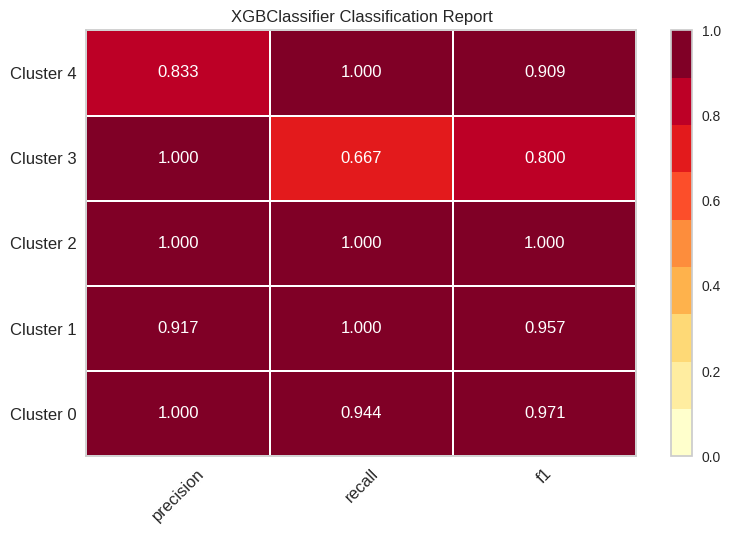

<Axes: title={'center': 'XGBClassifier Classification Report'}>

In [29]:
# Classification Report
cr = ClassificationReport(model, classes=[f'Cluster {i}' for i in range(k_clusters)])
cr.fit(X_train, y_train)
cr.score(X_test, y_test)
cr.show()


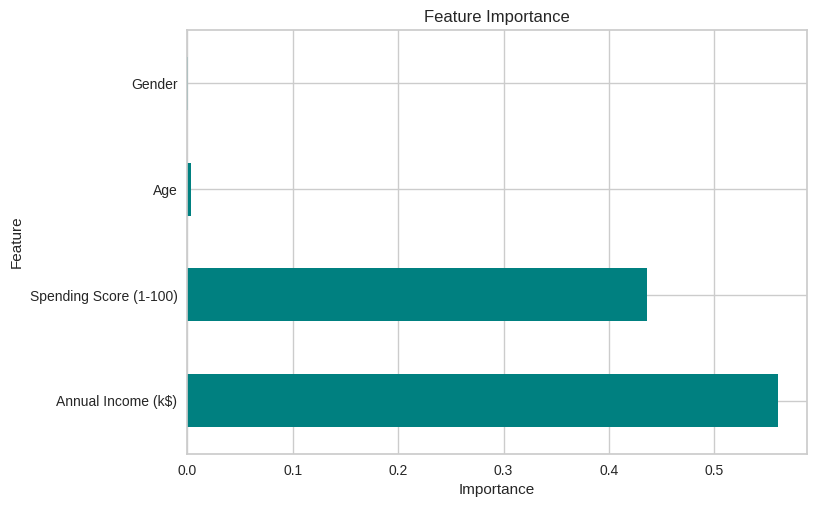

In [30]:
# Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='barh', color='teal')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()